# Coug Data Visualization

In [1]:
# imports
import rosbags_converter as rc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seatrac_enums import CST_E
from matplotlib.ticker import MaxNLocator
from scipy.stats import linregress

/home/claytonsmith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# User Variables

ROSBAGS_DIR = "../../bag"
SAVES_DIR = "../../bag/converted_bags"

MISSION_KEYWORDS = ["5.5"]
VEHCILE_NAMESPACES = ["/coug1", "/coug2", "/coug3"]
VEHICLE_IDS = [1,2,3]

VERBOSE=True

In [3]:
# Convert Rosbags
dataframes = rc.load_dataframes(SAVES_DIR, keywords=MISSION_KEYWORDS, verbose=True)
if len(dataframes)==0:
    print("converting rosbags")
    typestore = rc.generate_typestore("../../cougars-ros2/src")
    dataframes = rc.convert_rosbags(ROSBAGS_DIR, typestore, 
                                    keywords=MISSION_KEYWORDS,verbose=VERBOSE)
    rc.save_to_csv(dataframes, SAVES_DIR, verbose=VERBOSE)
    dataframes = rc.load_dataframes(SAVES_DIR, keywords=MISSION_KEYWORDS)

Loading /home/claytonsmith/Documents/cougUV/CoUGARs/bag/converted_bags/coug3_bluey/converted__SO_5.5_multi-2025-04-04-20-54-00
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/bag/converted_bags/coug3_bluey/converted__SO_5.5_multi-2025-04-04-20-54-41
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/bag/converted_bags/base_station/converted__SO_5.5_multi
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/bag/converted_bags/coug1/converted__so_5.5_multi-2025-04-18-16-42-57
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/bag/converted_bags/coug2/converted__SO_5.5_multi-2025-04-18-16-42-59


In [4]:
# display topics by rosbag
for path, topics in dataframes.items():
    print(f"{path}:\n\t{list(topics.keys())}")

coug3_bluey/converted__SO_5.5_multi-2025-04-04-20-54-00:
	['/coug3/modem_status', '/coug3/dvl/velocity', '/coug3/depth_data', '/coug3/dvl/dead_reckoning', '/coug3/modem_imu', '/coug3/pressure/data', '/tf', '/coug3/dvl/dr_global']
coug3_bluey/converted__SO_5.5_multi-2025-04-04-20-54-41:
	['/coug3/dvl/data', '/coug3/modem_rec', '/coug3/dvl/position', '/coug3/modem_status', '/coug3/dvl/velocity', '/coug3/depth_data', '/coug3/dvl/dead_reckoning', '/coug3/modem_imu', '/coug3/pressure/data', '/tf', '/coug3/dvl/dr_global']
base_station/converted__SO_5.5_multi:
	['/modem_rec', '/modem_send', '/modem_status', '/modem_cmd_update']
coug1/converted__so_5.5_multi-2025-04-18-16-42-57:
	['/coug1/extended_fix', '/coug1/dvl/dr_global', '/coug1/modem_rec', '/coug1/controls/command', '/coug1/dvl/dead_reckoning', '/coug1/gps_odom', '/coug1/desired_heading', '/coug1/modem_status', '/coug1/modem_imu', '/coug1/leak/data', '/coug1/safety_status', '/coug1/controls/debug', '/coug1/fix', '/coug1/pressure/data', 

In [5]:
# lists dataframes by topic. 
# Assumes all vehicles have different namespaces
# Check previous cell output to confirm this is the case
dfsByMission = {}
for keyword in MISSION_KEYWORDS:
    dfsByTopic = {}
    for path, topic_dfs in dataframes.items(): 
        if keyword in path.parts[-1]:
            dfsByTopic.update(topic_dfs)
    dfsByMission[keyword] = dfsByTopic
    print(f"{keyword}: {list(dfsByTopic.keys())}")

5.5: ['/coug3/modem_status', '/coug3/dvl/velocity', '/coug3/depth_data', '/coug3/dvl/dead_reckoning', '/coug3/modem_imu', '/coug3/pressure/data', '/tf', '/coug3/dvl/dr_global', '/coug3/dvl/data', '/coug3/modem_rec', '/coug3/dvl/position', '/modem_rec', '/modem_send', '/modem_status', '/modem_cmd_update', '/coug1/extended_fix', '/coug1/dvl/dr_global', '/coug1/modem_rec', '/coug1/controls/command', '/coug1/dvl/dead_reckoning', '/coug1/gps_odom', '/coug1/desired_heading', '/coug1/modem_status', '/coug1/modem_imu', '/coug1/leak/data', '/coug1/safety_status', '/coug1/controls/debug', '/coug1/fix', '/coug1/pressure/data', '/coug1/battery/data', '/coug1/depth_data', '/coug1/dvl/position', '/coug1/kinematics/command', '/coug1/desired_speed', '/coug1/desired_depth', '/coug2/desired_heading', '/coug2/controls/command', '/coug2/controls/debug', '/coug2/fix', '/coug2/dvl/dr_global', '/coug2/dvl/position', '/coug2/leak/data', '/coug2/safety_status', '/coug2/depth_data', '/coug2/battery/data', '/cou

In [6]:
# Display a dataframe
try:
    print(f"DataFrame example: base station modem update")
    sampleDf = dfsByMission[MISSION_KEYWORDS[0]]["/modem_status"]
    print(sampleDf.iloc[:5,:4])
    print("...")
except:
    print("no data")

DataFrame example: base station modem update
   header.stamp.sec  header.stamp.nanosec  header.frame_id  msg_id
0        1745016163             255680539              NaN      16
1        1745016163             352069301              NaN      16
2        1745016163             453934647              NaN      16
3        1745016163             554092844              NaN      16
4        1745016163             656117169              NaN      16
...


In [7]:
# convert ros timestamps to pandas timestamps
for mission, dfsByTopic in dfsByMission.items():
    print(f"--- {mission} ---")
    for df in dfsByTopic.values():
        if "header.stamp.sec" in df.columns: 
            df["timestamp"] = pd.to_datetime(
                df["header.stamp.sec"] * 1_000_000_000 
                + df["header.stamp.nanosec"], unit='ns'
            )
    try:
        bst_timestamps = dfsByTopic["/modem_status"]["timestamp"]
        bst_dt = (bst_timestamps.max() - bst_timestamps.min()).seconds
        print(f"basestation:\t{bst_dt}s, {bst_timestamps.min()} --- {bst_timestamps.max()}")
    except:
        print("basestation: no data")
    for ns in VEHCILE_NAMESPACES:
        try:
            timestamps = dfsByTopic[ns+'/modem_status']['timestamp']
            dt = (timestamps.max() - timestamps.min()).seconds
            print(f"{ns}:\t{dt}s,\t{timestamps.min()} --- {timestamps.max()}")
        except:
            print(f"{ns}: no data")

--- 5.5 ---
basestation:	112s, 2025-04-18 22:42:43.255680539 --- 2025-04-18 22:44:36.028592480
/coug1:	274s,	2025-04-18 22:42:59.484101776 --- 2025-04-18 22:47:33.937215951
/coug2:	234s,	2025-04-18 22:43:00.784466207 --- 2025-04-18 22:46:55.201137650
/coug3:	106s,	2025-04-04 19:54:42.331409795 --- 2025-04-04 19:56:28.605630261


--- 5.5 ---


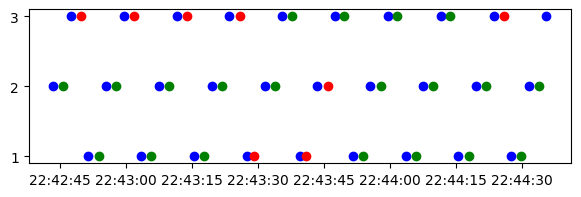

In [ ]:
# Base station pings over time
for mission, dfsByTopic in dfsByMission.items():
    try:
        print(f"--- {mission} ---")
        bst_rec = dfsByTopic["/modem_rec"]
        bst_cmd = dfsByTopic["/modem_cmd_update"]
        bst_send = bst_cmd[bst_cmd["command_status_code"]==CST_E.CST_OK]
        bst_err = bst_cmd[bst_cmd["command_status_code"]!=CST_E.CST_OK]

        bst_rec_plt_err = bst_rec[bst_rec["position_flt_error"]]
        bst_rec_good = bst_rec[~bst_rec["position_flt_error"]]

        fig, ax = plt.subplots(figsize=(7, 2))
        ax.plot(bst_send["timestamp"], bst_send["target_id"], 'bo')
        ax.plot(bst_rec_good["timestamp"], bst_rec_good["src_id"], 'go')
        ax.plot(bst_rec_plt_err["timestamp"], bst_rec_plt_err["src_id"], 'go')
        ax.plot(bst_err["timestamp"], bst_err["target_id"], 'ro')

        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show()
    except KeyError:
        print("no data")

--- 5.5 ---


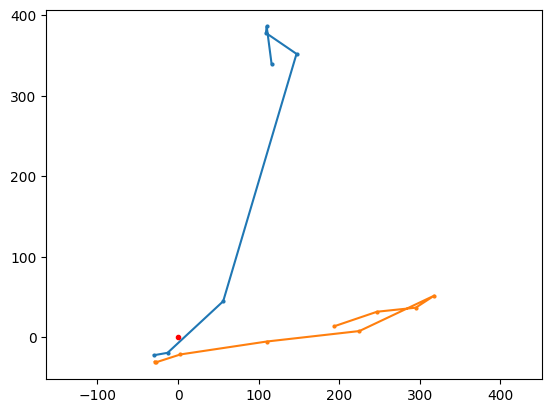

In [9]:
# Modem predicted paths relative to base station
for mission, dfsByTopic in dfsByMission.items():
    print(f"--- {mission} ---")
    bst_rec = dfsByTopic["/modem_rec"]
    
    for bid in range(15):
        modem_from_bid = bst_rec[bst_rec['src_id']==bid]
        if len(modem_from_bid)>0:
            plt.plot(modem_from_bid['position_easting'],
                    modem_from_bid['position_northing'], 
                    "-o", markersize=2)
    plt.plot([0],[0],'ro',markersize=3)
    plt.axis('equal')
    plt.show()

--- 5.5 ---
/coug1


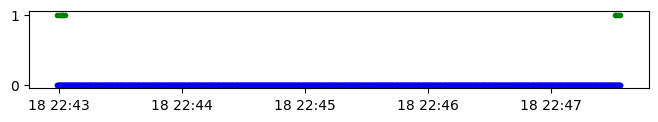

/coug2


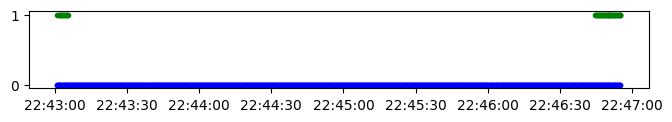

/coug3: no data


In [10]:
# GPS and DVL timeseries
for mission, dfsByTopic in dfsByMission.items():
    print(f"--- {mission} ---")
    for ns in VEHCILE_NAMESPACES:
        try:
            gps_df = dfsByTopic[ns+"/gps_odom"]
            dvl_df = dfsByTopic[ns+"/dvl/dead_reckoning"]
            gps_ts = gps_df["timestamp"]
            dvl_ts = dvl_df["timestamp"]
            fig, ax = plt.subplots(figsize=(8, 1))
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            ax.plot(gps_ts, [1]*len(gps_ts), 'go', markersize=3)
            ax.plot(dvl_ts, [0]*len(dvl_ts), 'bo', markersize=3)
            print(ns)
            plt.show()
        except KeyError:
            print(ns+": no data")


--- 5.5 ---
/coug1


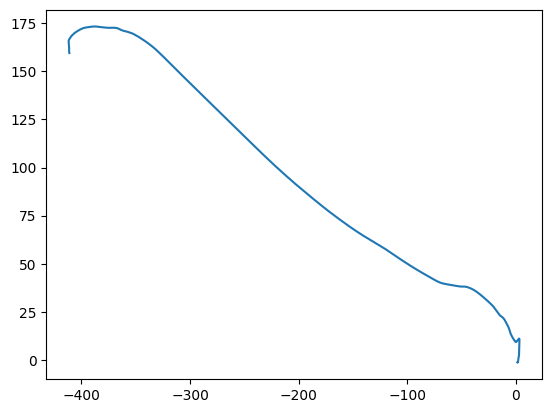

/coug2


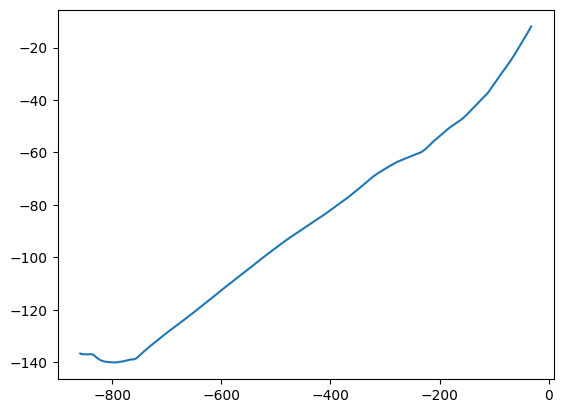

/coug3


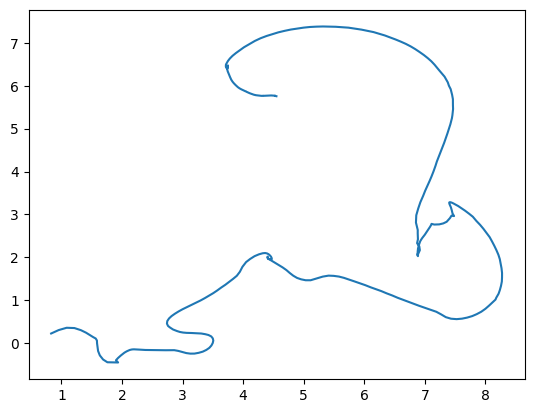

In [11]:
for mission, dfsByTopic in dfsByMission.items():
    print(f"--- {mission} ---")
    for ns in VEHCILE_NAMESPACES:
        try:
            dvl_df = dfsByTopic[ns+"/dvl/dead_reckoning"]
            plt.plot(dvl_df["pose.pose.position.x"], dvl_df["pose.pose.position.y"])
            print(ns)
            plt.show()
        except KeyError:
            print(ns+": no data")